In [43]:
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [16]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [52]:
def convert_time(str_time):
    return str_time.split(" ")[1][:2]
    # return time.mktime(datetime.datetime.strptime(str_time, "%Y-%m-%d %H:%M:%S").timetuple())

In [58]:
def first_cleansing_step(data):
    data['Time'] = data['Time'].apply(convert_time)
    return data

In [54]:
def correlation_series(X, Y):
    X_mean = np.mean(X)
    X_std = np.std(X)
    Y_mean = np.mean(Y)
    Y_std = np.std(Y)
    return [(x - X_mean) * (y - Y_mean) / (X_std * Y_std) for x,y in zip(X,Y)]

In [55]:
traffic_data = pd.read_csv("traffic.csv", sep=";")
pollution_data = pd.read_csv("pollution.csv", sep=";")
traffic_data = first_cleansing_step(traffic_data)
pollution_data = first_cleansing_step(pollution_data)
print(pollution_data.columns)

Index(['Time', 'mlk-peeples', 'mlk-magnolia', 'mlk-lindsay', 'mlk-houston',
       'mlk-georgia', 'mlk-douglas', 'mlk-central'],
      dtype='object')


In [56]:
traffic_data.columns

Index(['Time', 'mlk-georgia-cam-3', 'mlk-georgia-cam-1', 'mlk-houston-cam-1',
       'mlk-lindsay-cam-2', 'mlk-douglas-cam-1', 'mlk-central-cam-2',
       'mlk-peeples-cam-3', 'mlk-douglas-cam-2', 'mlk-peeples-cam-1',
       'mlk-magnolia-cam-2'],
      dtype='object')

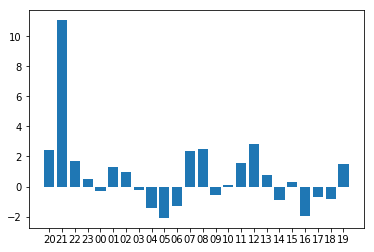

In [70]:
def plot_histogram(times, y):
    times_dict = dict()
    for time, element in zip(times, y):
        if time not in times_dict:
            times_dict[time] = (0,0)
        N =  times_dict[time][1]
        times_dict[time] = ((times_dict[time][0]*N)/(N+1) + element, N+1) 
    bins = times_dict.keys()
    values = [times_dict[item][0] for item in bins]
    plt.bar(list(bins), values, align='center')

corr = correlation_series(pollution_data["mlk-peeples"], traffic_data['mlk-peeples-cam-3'])   
plot_histogram(traffic_data['Time'], corr)

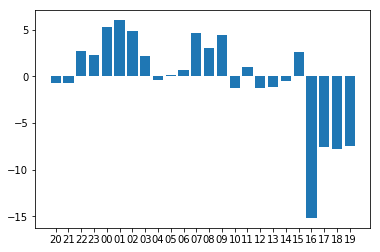

In [71]:
corr = correlation_series(pollution_data['mlk-douglas'], traffic_data['mlk-douglas-cam-1'])
plot_histogram(traffic_data['Time'], corr)